In [38]:
import pandas as pd
import numpy as np
import json
import requests
import pprint
import matplotlib.pyplot as plt
import hvplot.pandas
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats

In [8]:
bank_data_path = "../DATA/final_bank_data.csv"
bank_data = pd.read_csv(bank_data_path)

bank_data

,Bank,Fiscal Year,Total IB Fees,Market Share %,Net Interest Income,Non Interest Income,Total Revenue,Total Non-Interest Expense,Net Income,Total Assets,Total Liabilities,IB Fees as a % of Net Revenue,IB Fees as a % of Non-Interest Income
0,Jefferies,2021,4366,$0.13,89,8096,8185,5760,1677,60404,49674,0.53,0.54
1,Jefferies,2020,2501,$0.12,88,5923,6011,4784,768,53118,43530,0.42,0.42
2,Jefferies,2019,1527,$0.11,101,3792,3893,3530,963,49460,39706,0.39,0.40
3,Jefferies,2018,1905,$0.10,85,3679,3764,3435,277,47131,36907,0.51,0.52
4,Jefferies,2017,1764,$0.09,79,3998,4077,3295,-35,47169,36478,0.43,0.44
5,Credit Suisse,2021,14440,$0.15,6373,18521,24894,20940,-1783,829037,780523,0.58,0.78
6,Credit Suisse,2020,13316,$0.15,6682,18471,25153,20026,2995,920082,871839,0.53,0.72
7,Credit Suisse,2019,11476,$0.15,7217,15907,23124,17936,3522,809724,764765,0.50,0.72
8,Credit Suisse,2018,12053,$0.15,7105,14101,21206,17539,2039,779438,724896,0.57,0.85
9,Credit Suisse,2017,12129,$0.14,6730,14721,21451,19395,-1009,817293,773991,0.57,0.82


In [3]:
mean = bank_data["Total Revenue"].groupby(bank_data["Bank"]).mean()
median = bank_data["Total Revenue"].groupby(bank_data["Bank"]).median()
variance = bank_data["Total Revenue"].groupby(bank_data["Bank"]).var()
standev = bank_data["Total Revenue"].groupby(bank_data["Bank"]).std()
sem = bank_data["Total Revenue"].groupby(bank_data["Bank"]).sem()

revenue = pd.DataFrame({"Mean Revenue": mean,
                       "Median Revenue": median,
                       "Revenue Variance": variance,
                       "Revenue Std. Dev": standev,
                       "Revenue Std. Err": sem})

revenue

,Mean Revenue,Median Revenue,Revenue Variance,Revenue Std. Dev,Revenue Std. Err
Bank,,,,,
Bank of America,88806.2,89113.0,6126893.2,2475.256189,1106.968220
Barclays,14650.2,14511.0,1574049.2,1254.611175,561.079174
Citi Bank,28637.0,28632.0,2316894.0,1522.134685,680.719325
Credit Suisse,23165.6,23124.0,3429685.3,1851.940955,828.213173
Deutsche Bank,32882.0,29476.0,43038192.5,6560.350029,2933.877724
Goldman Sachs,42244.2,37211.0,107681553.7,10376.972280,4640.723084
JP Morgan,113410.8,115720.0,74153021.2,8611.214850,3851.052355
Jefferies,5186.0,4077.0,3649610.0,1910.395247,854.354727
Morgan Stanley,45620.4,41538.0,78900127.8,8882.574390,3972.408030


In [10]:
top_banks_revenue = revenue.sort_values(["Mean Revenue"], ascending = False)
top_banks_revenue

,Mean Revenue,Median Revenue,Revenue Variance,Revenue Std. Dev,Revenue Std. Err
Bank,,,,,
JP Morgan,113410.8,115720.0,74153021.2,8611.214850,3851.052355
Bank of America,88806.2,89113.0,6126893.2,2475.256189,1106.968220
Morgan Stanley,45620.4,41538.0,78900127.8,8882.574390,3972.408030
Goldman Sachs,42244.2,37211.0,107681553.7,10376.972280,4640.723084
RBC Bank,36093.2,35390.0,9118235.7,3019.641651,1350.424800
Deutsche Bank,32882.0,29476.0,43038192.5,6560.350029,2933.877724
Citi Bank,28637.0,28632.0,2316894.0,1522.134685,680.719325
Credit Suisse,23165.6,23124.0,3429685.3,1851.940955,828.213173
Barclays,14650.2,14511.0,1574049.2,1254.611175,561.079174


In [6]:
mean = bank_data["Net Income"].groupby(bank_data["Bank"]).mean()
median = bank_data["Net Income"].groupby(bank_data["Bank"]).median()
variance = bank_data["Net Income"].groupby(bank_data["Bank"]).var()
standev = bank_data["Net Income"].groupby(bank_data["Bank"]).std()
sem = bank_data["Net Income"].groupby(bank_data["Bank"]).sem()

net_income = pd.DataFrame({"Net Income Mean": mean,
                       "Net Income Median": median,
                       "Net Income Variance": variance,
                       "Net Income Std.Dev.": standev,
                       "Net Income Std. Err": sem})

net_income

,Net Income Mean,Net Income Median,Net Income Variance,Net Income Std.Dev.,Net Income Std. Err
Bank,,,,,
Bank of America,55503.0,54900.0,6203422.5,2490.667079,1113.860180
Barclays,7590.6,8003.0,475129.3,689.296235,308.262648
Citi Bank,28608.2,31123.0,23860423.7,4884.713267,2184.510183
Credit Suisse,1152.8,2039.0,5771115.2,2402.314551,1074.347728
Deutsche Bank,26221.2,25436.0,3433759.7,1853.040663,828.704978
Goldman Sachs,16200.0,13750.0,41340377.5,6429.648319,2875.426142
JP Morgan,48175.4,50306.0,22794390.3,4774.347107,2135.152936
Jefferies,730.0,768.0,435744.0,660.109082,295.209756
Morgan Stanley,30247.4,30076.0,48854678.8,6989.612207,3125.849606


In [11]:
top_banks_income = net_income.sort_values(["Net Income Mean"], ascending = False)
top_banks_income

,Net Income Mean,Net Income Median,Net Income Variance,Net Income Std.Dev.,Net Income Std. Err
Bank,,,,,
Bank of America,55503.0,54900.0,6203422.5,2490.667079,1113.860180
JP Morgan,48175.4,50306.0,22794390.3,4774.347107,2135.152936
Morgan Stanley,30247.4,30076.0,48854678.8,6989.612207,3125.849606
Citi Bank,28608.2,31123.0,23860423.7,4884.713267,2184.510183
Deutsche Bank,26221.2,25436.0,3433759.7,1853.040663,828.704978
RBC Bank,17958.0,18336.0,1246574.5,1116.501008,499.314430
Goldman Sachs,16200.0,13750.0,41340377.5,6429.648319,2875.426142
Barclays,7590.6,8003.0,475129.3,689.296235,308.262648
Credit Suisse,1152.8,2039.0,5771115.2,2402.314551,1074.347728


In [16]:
goldman_df = bank_data.loc[bank_data["Bank"]=="Goldman Sachs", :]
goldman_df

,Bank,Fiscal Year,Total IB Fees,Market Share %,Net Interest Income,Non Interest Income,Total Revenue,Total Non-Interest Expense,Net Income,Total Assets,Total Liabilities,IB Fees as a % of Net Revenue,IB Fees as a % of Non-Interest Income
20,Goldman Sachs,2021,14168,$0.13,6470,52869,59339,31938,27401,1463988,1463988,0.55,0.24
21,Goldman Sachs,2020,9141,$0.14,4751,39809,44560,28983,15577,1163028,1163028,0.21,0.21
22,Goldman Sachs,2019,6798,$0.11,4362,32184,36546,24898,11648,992968,992968,0.19,0.19
23,Goldman Sachs,2018,7430,$0.09,4362,32849,37211,23461,13750,931796,931796,0.20,0.20
24,Goldman Sachs,2017,7076,$0.16,3767,29798,33565,20941,12624,916776,916776,0.21,0.21


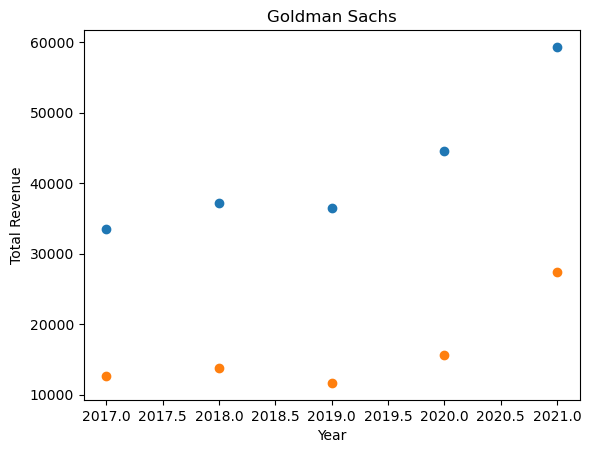

In [28]:
fig1, ax1 = plt.subplots()
total_rev_gs = goldman_df["Total Revenue"]
total_inc_gs = goldman_df["Net Income"]
year = goldman_df["Fiscal Year"]
plt.scatter(year,total_rev_gs)
plt.scatter(year,total_inc_gs)          
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Goldman Sachs")
plt.show()

In [17]:
boa_df = bank_data.loc[bank_data["Bank"]=="Bank of America", :]
boa_df

,Bank,Fiscal Year,Total IB Fees,Market Share %,Net Interest Income,Non Interest Income,Total Revenue,Total Non-Interest Expense,Net Income,Total Assets,Total Liabilities,IB Fees as a % of Net Revenue,IB Fees as a % of Non-Interest Income
40,Bank of America,2021,8887,0.07,42934,46179,89113,31978,59731,3169495,2899429,0.27,0.10
41,Bank of America,2020,7180,0.06,43360,42168,85528,17894,55213,2819627,2546703,0.53,0.08
42,Bank of America,2019,5642,0.05,48891,42353,91244,27430,54900,2434079,2169269,0.06,0.06
43,Bank of America,2018,5327,0.08,48162,42858,91020,28147,53154,2325246,2060498,0.06,0.06
44,Bank of America,2017,6011,0.07,45239,41887,87126,18232,54517,2268633,1997344,0.07,0.07


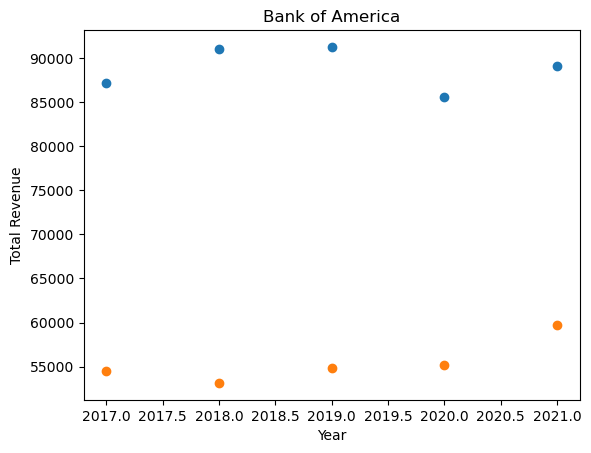

In [31]:
fig1, ax1 = plt.subplots()
total_rev_boa = boa_df["Total Revenue"]
total_inc_boa = boa_df["Net Income"]
year = boa_df["Fiscal Year"]
plt.scatter(year,total_rev_boa)
plt.scatter(year,total_inc_boa)          
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Bank of America")
plt.show()

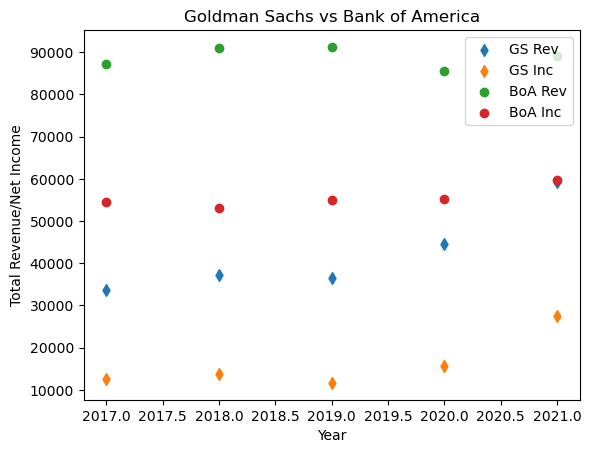

In [37]:
fig1, ax1 = plt.subplots()
#goldman sachs
total_rev_gs = goldman_df["Total Revenue"]
total_inc_gs = goldman_df["Net Income"]
year = goldman_df["Fiscal Year"]
plt.scatter(year,total_rev_gs, marker = "d")
plt.scatter(year,total_inc_gs, marker = "d")          

#bank of america
total_rev_boa = boa_df["Total Revenue"]
total_inc_boa = boa_df["Net Income"]
year = boa_df["Fiscal Year"]
plt.scatter(year,total_rev_boa)
plt.scatter(year,total_inc_boa)          
plt.xlabel("Year")
plt.ylabel("Total Revenue/Net Income")
plt.title("Goldman Sachs vs Bank of America")
plt.legend(["GS Rev", "GS Inc", "BoA Rev", "BoA Inc"])
plt.show()